In [1]:
import pandas as pd

df = pd.read_pickle('sokureplays.pkl')
characters = ['aya', 'youmu', 'iku', 'reimu', 'reisen', 'remilia', 'marisa',
        'suika', 'tenshi', 'yuyuko', 'komachi', 'suwako', 'sakuya',
        'utsuho', 'meiling', 'yukari', 'patchouli', 'alice', 'cirno',
        'sanae']

df_no_mirror_matches = df.query("server_character != client_character")
df_mirror_matches = df.query("server_character == client_character")

df_server = df[['server_player_id','server_rounds', 'server_character', 'client_character', 'server_cards', 'server_nick', 'server_country']].copy()
df_client = df[['client_player_id','client_rounds', 'client_character', 'server_character', 'client_cards', 'client_nick', 'client_country']].copy()

df_server.rename(columns={'server_player_id': 'player_id', 'server_rounds': 'rounds', 'server_character': 'character', 'client_character': 'opponent', 'server_cards': 'cards', 'server_nick': 'nick', 'server_country': 'country'}, inplace=True)
df_client.rename(columns={'client_player_id': 'player_id', 'client_rounds': 'rounds', 'client_character': 'character', 'server_character': 'opponent', 'client_cards': 'cards', 'client_nick': 'nick', 'client_country': 'country'}, inplace=True)

join = pd.concat([df_server, df_client], ignore_index=True)

df = join

In [2]:
import requests
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

urls = [
    'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Light.ttf',
    'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Regular.ttf',
    'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Medium.ttf',
    'https://github.com/openmaptiles/fonts/raw/master/roboto/Roboto-Bold.ttf'
]

for url in urls:
    filename = url.split('/')[-1]
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)

# @title Typesetting
# https://stackoverflow.com/a/65841091
from matplotlib import font_manager as fm, pyplot as plt

font_files = fm.findSystemFonts('.')

# Install fonts
for font_file in font_files:
  fm.fontManager.addfont(font_file)
  
  # @title Colors
colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('flare_r',  12)
colors_heat1 = sns.color_palette('flare_r', as_cmap=True)
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)

color_bg = "#1B181C"
color_text = "#FFFFFF"

# @title Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = 16,8

# Text
mpl.rcParams['font.family'] = 'Roboto'

# Title
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'

# Labels
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22

# Spacing
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0

# Spines and grids
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Legends
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

# Bars
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

# Colors
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg

# Text colors
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text

# Line colors
mpl.rcParams['axes.edgecolor'] = color_text

In [3]:
#Convert ISO A2 to A3
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3

df = df.query("country != ''")
df['country'] = df['country'].apply(lambda x: country_alpha2_to_country_name(x.upper(), cn_name_format="default"))
df['country'] = df['country'].apply(lambda x: country_name_to_country_alpha3(x, cn_name_format="default"))

C:\Users\RE\AppData\Local\Temp\ipykernel_17548\1305271748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].apply(lambda x: country_alpha2_to_country_name(x.upper(), cn_name_format="default"))
c:\Users\RE\AppData\Local\Programs\Python\Python312\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
c:\Users\RE\AppData\Local\Programs\Python\Python312\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
C:\Users\RE\AppData\Local\Temp\ipykernel_17548\1305271748.py:6: SettingWithCopyWarning: 
A value is try

In [4]:
df

,player_id,rounds,character,opponent,cards,nick,country
0,1,1,aya,reisen,"[100, 100, 100, 101, 101, 106, 106, 106, 106, ...",,ITA
1,1,0,aya,reisen,"[100, 100, 100, 101, 101, 106, 106, 106, 106, ...",,ITA
2,1,0,aya,reisen,"[100, 100, 100, 101, 101, 106, 106, 106, 106, ...",,ITA
3,3,0,youmu,sanae,"[16, 16, 101, 101, 101, 101, 200, 200, 200, 20...",,CHL
4,1,1,aya,reisen,"[100, 100, 100, 101, 101, 106, 106, 106, 106, ...",,ITA
...,...,...,...,...,...,...,...
4327343,221787,1,remilia,remilia,"[12, 12, 12, 13, 13, 101, 101, 101, 101, 102, ...",mika_misono,BRA
4327344,99427,2,marisa,remilia,"[12, 12, 13, 13, 13, 15, 15, 100, 100, 100, 10...",,USA
4327345,416,2,aya,alice,"[12, 12, 12, 12, 15, 15, 15, 15, 100, 100, 100...",auric.,USA
4327346,103032,1,alice,marisa,"[12, 12, 13, 13, 103, 103, 103, 103, 104, 104,...",holsety.,GBR


In [5]:
most_popular_character = {
    'country': [],
    'character': []
}
for country in df['country'].unique():
    country_df = df.query(f"country == '{country}'")
    
    top_percentage = 0    
    current_top_chara = "reimu"
    for character in df['character'].unique():
        total_chara_games = country_df.query(f"character == '{character}'").shape[0]
        total_games = country_df.shape[0]
        new_percentage = (total_chara_games / total_games) * 100
        
        if new_percentage > top_percentage:
            top_percentage = new_percentage
            current_top_chara = character

    most_popular_character['country'].append(country)
    most_popular_character['character'].append(current_top_chara)
    
pop_df = pd.DataFrame(most_popular_character)

In [6]:
pop_df

,country,character
0,ITA,youmu
1,CHL,patchouli
2,USA,patchouli
3,RUS,utsuho
4,UKR,komachi
...,...,...
123,LCA,suwako
124,SDN,utsuho
125,COD,iku
126,CUB,meiling


In [7]:
df['character'].unique()

array(['aya', 'youmu', 'iku', 'reisen', 'remilia', 'marisa', 'suwako',
       'sakuya', 'utsuho', 'reimu', 'tenshi', 'komachi', 'suika',
       'yuyuko', 'meiling', 'yukari', 'alice', 'patchouli', 'cirno',
       'sanae'], dtype=object)

C:\Users\RE\AppData\Local\Temp\ipykernel_17548\1266502975.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
C:\Users\RE\AppData\Local\Temp\ipykernel_17548\1266502975.py:53: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf.plot(column='character', categorical=True, color=[category_colors.get(x, 'grey') for x in gdf['character']], linewidth=.6, edgecolor='0.2', ax=ax)


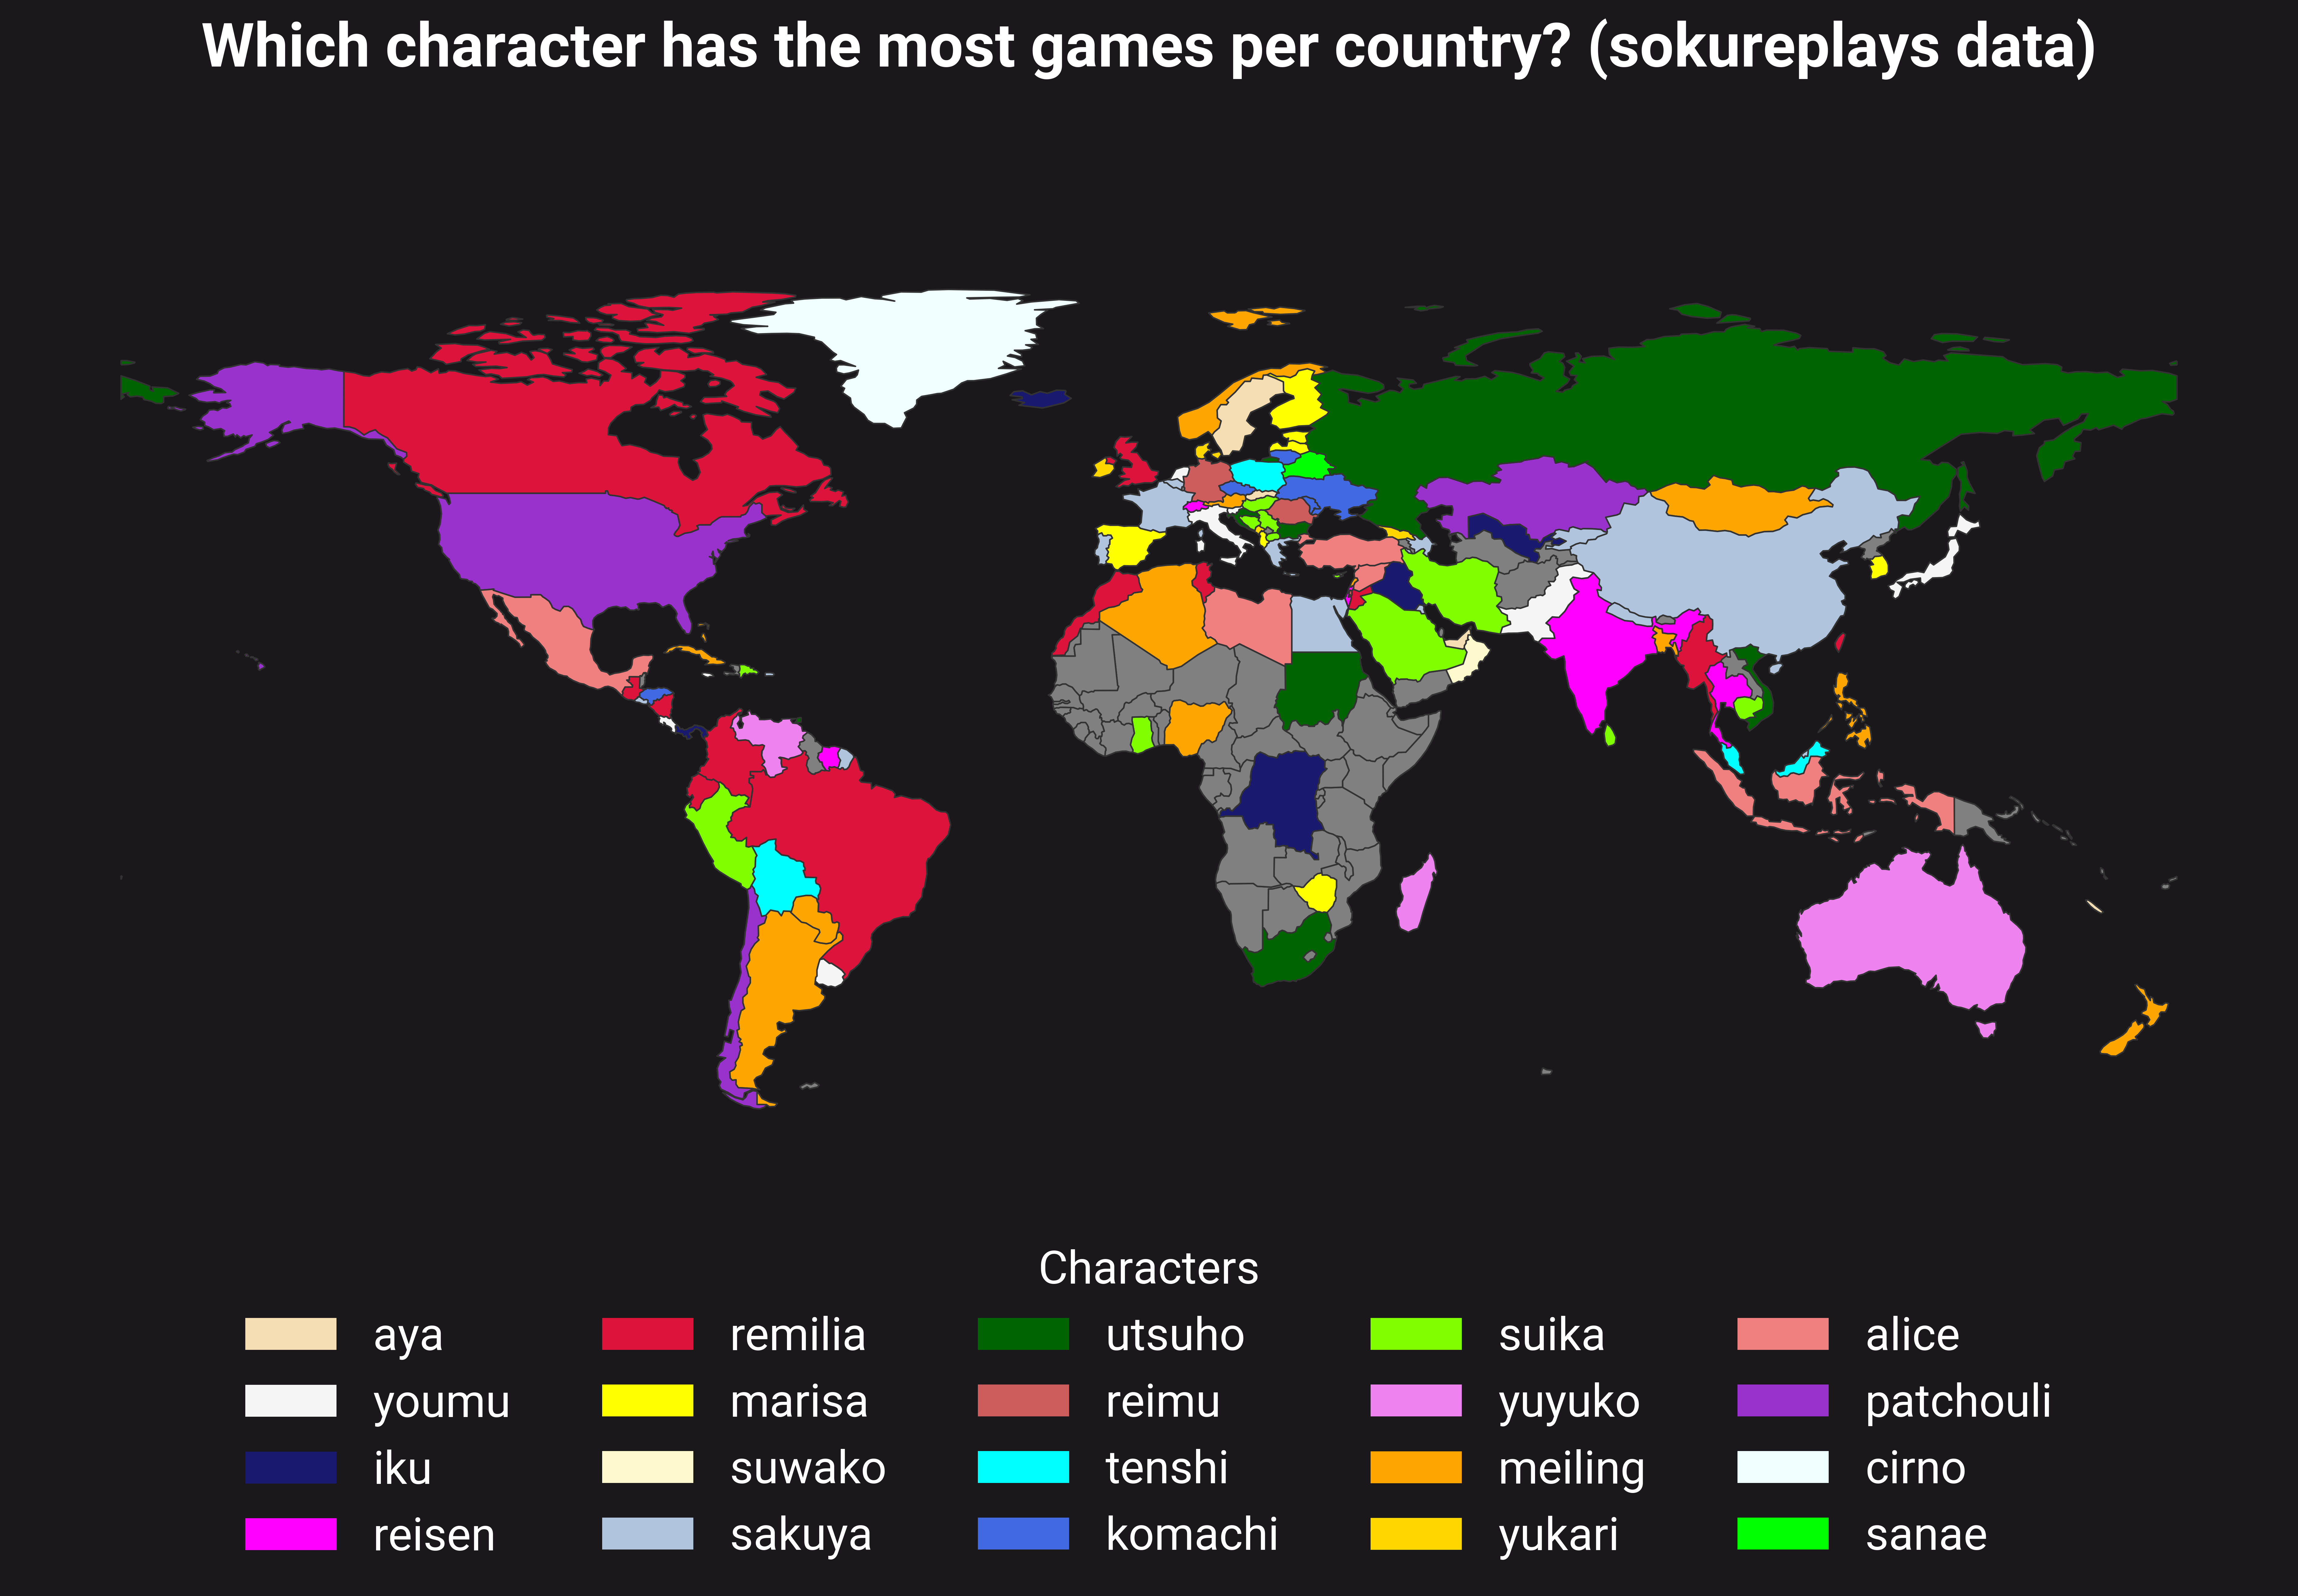

In [33]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world[world['continent'] != 'Antarctica']

# Merge the world map data with your games data
gdf = world.set_index('iso_a3').join(pop_df.set_index('country'))

category_colors = {
    'aya' : 'wheat',
    'youmu' : 'whitesmoke',
    'iku' : 'midnightblue',
    'reisen' : 'fuchsia',
    'remilia': 'crimson',
    'marisa': 'yellow',
    'suwako': 'lemonchiffon',
    'sakuya': 'lightsteelblue',
    'utsuho': 'mediumspringgreen',
    'reimu': 'indianred',
    'tenshi': 'cyan',
    'komachi': 'royalblue',
    'suika': 'chartreuse',
    'yuyuko': 'violet',
    'meiling': 'orange',
    'yukari': 'gold',
    'alice': 'lightcoral',
    'patchouli': 'darkorchid',
    'cirno': 'azure',
    'sanae': 'lime'    
}

# Create the figure and axis
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()

# Plot a basic map of the world
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)

# Create legend patches for each category
legend_patches = [mpatches.Patch(color=color, label=character) for character, color in category_colors.items()]

# Plot the countries with the color representing the total games
gdf.plot(column='character', categorical=True, color=[category_colors.get(x, 'grey') for x in gdf['character']], linewidth=.6, edgecolor='0.2', ax=ax)

# Add the custom legend
plt.legend(handles=legend_patches, title='Characters', bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol=5)

# Turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Set the plot title
plt.title("Which character has the most games per country? (sokureplays data)", fontsize=24)
plt.show()
